In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
## Inspecting the tables for column names and datatypes
inspector = inspect(engine)
columns_m = inspector.get_columns('measurement')
for column in columns_m:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = dt.datetime.strptime(most_recent_date[0], "%Y-%m-%d")
print(most_recent_date)

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)
print(one_year_ago)


2017-08-23 00:00:00
2016-08-23 00:00:00


In [13]:
# Perform a query to retrieve the date and precipitation scores
sel = [Measurement.date, Measurement.prcp]
query_prcp = session.query(*sel).\
    filter(Measurement.date >= one_year_ago).filter(Measurement.date <= most_recent_date).all()

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(query_prcp, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_df.sort_values(by='date')

prcp_df

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


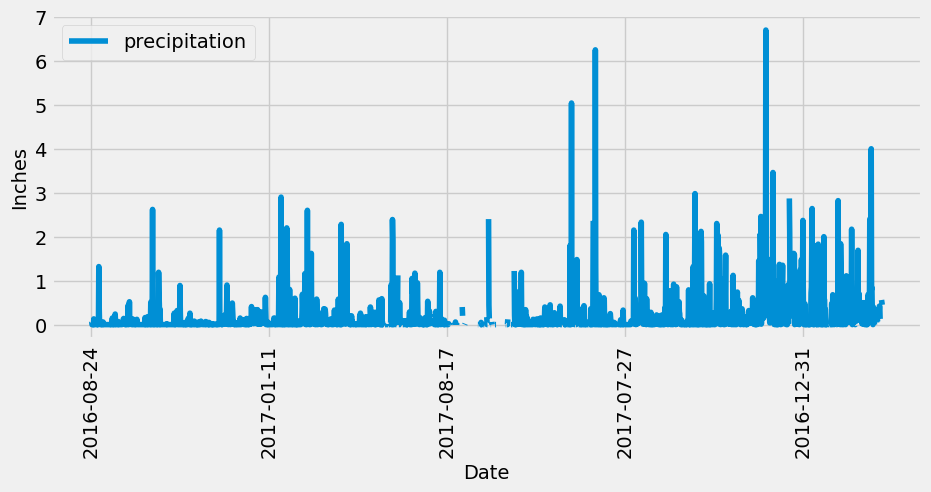

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot('date', 'precipitation', figsize = (10,4), rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

##how do I change my xticks? plt.xticks??


plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()


9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station, func.count(Measurement.date)]
station_activity = session.query(*sel).\
    group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [Measurement.station, func.min(Measurement.tobs)]
min_temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').order_by(Measurement.station).all()
for x in min_temp: 
    print(f'The lowest temperature is {x[1]}')

sel = [Measurement.station, func.max(Measurement.tobs)]
max_temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').order_by(Measurement.station).all()
for y in max_temp: 
    print(f'The highest temperature is {y[1]}')
    
sel = [Measurement.station, func.avg(Measurement.tobs)]
avg_temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').order_by(Measurement.station).all()
for z in avg_temp: 
    print(f'The average temperature is {z[1]}')


The lowest temperature is 54.0
The highest temperature is 85.0
The average temperature is 71.66378066378067


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

## getting most recent date 
last_temp_date = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
last_temp_date = dt.datetime.strptime(last_temp_date[0], "%Y-%m-%d")
print(last_temp_date)

# getting the date one year from the most recent date
first_temp_date = last_temp_date - dt.timedelta(days=365)
print(first_temp_date)

# query the dataset to retrieve the temperature and frequency 
sel = [Measurement.station, Measurement.date, Measurement.tobs]
station_temp_query = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= first_temp_date).filter(Measurement.date <= last_temp_date).\
    order_by(Measurement.date).all()

# putting into a dataframe
station_temp_df = pd.DataFrame(station_temp_query, columns=['station', 'date', 'tobs'])
station_temp_df.sort_values(by='date')
station_temp_df

2017-08-18 00:00:00
2016-08-18 00:00:00


,station,date,tobs
0,USC00519281,2016-08-19,79.0
1,USC00519281,2016-08-20,81.0
2,USC00519281,2016-08-21,79.0
3,USC00519281,2016-08-22,78.0
4,USC00519281,2016-08-23,77.0
...,...,...,...
351,USC00519281,2017-08-14,77.0
352,USC00519281,2017-08-15,77.0
353,USC00519281,2017-08-16,76.0
354,USC00519281,2017-08-17,76.0


Text(0, 0.5, 'Frequency')

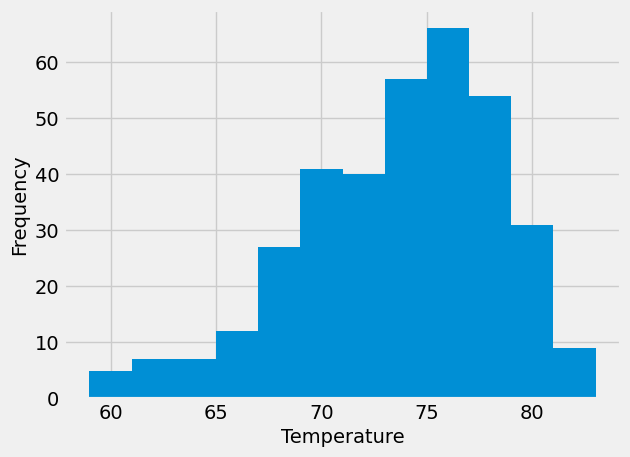

In [21]:
# Plot as a histogram
plt.hist(station_temp_df['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [22]:
# Close Session
session.close()